***
## Python Modules Imported for Project
***

In [1]:
import numpy as np 
import matplotlib.pyplot as plt #Matplotlib is a Python plotting library 
%matplotlib inline 
#This is the magic number fix for plots
import seaborn as sns
# Seaborn is a library plotting in Python
import pandas as pd # import pandas this is to import the dataset in to a dataframe structure
import sklearn.linear_model as lin # For Linear Regression algorithm
from sklearn.model_selection import train_test_split #To split the dataset in to training and testing sets
from sklearn import metrics # This for evaluation the MAE - Mean Absolute Error, MSE - Mean Squared Error & RMSE - Root Mean Squared Error




***
## Importing and Analysing the Dataset
***

In [2]:
#Read in the dataset as a pandas Dataframe wind_df
wind_df = pd.read_csv('./powerproduction.csv')

In [3]:
wind_df.shape #The Dataset is 500 rows and two columns

(500, 2)

In [4]:
#Prints the first 5 rows of the dataset
wind_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
#Print the keys of the dataset
print(wind_df.keys())

Index(['speed', 'power'], dtype='object')


In [6]:
#Print Dataset shape
print(wind_df.power.shape)

(500,)


In [7]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
#Prints the statistical details of the dataset
wind_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


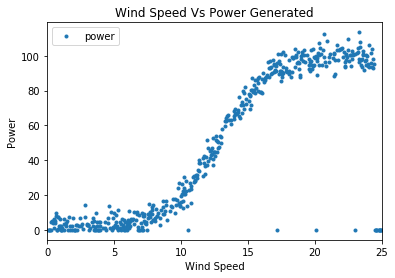

In [9]:
# Plot graph to get a visual view of the dataset
wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

Text(0, 0.5, 'Power')

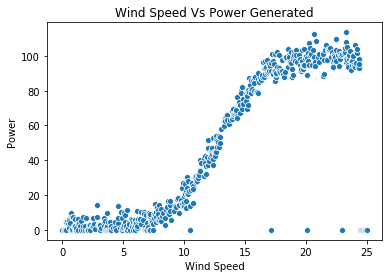

In [10]:
#The Seaborn scatter plot is added for comparsion 
sns.scatterplot(x='speed',y='power',data = wind_df)
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')

### Observations

* From both plots above it can be seen that there is a positive linear relationship between the wind speed and the power generated at certain wind speeds. There is an initial wind speed up to 7 where there is not much change in power then it is capped when the wind is over 20 - 24.


* From analysing the dataset we can see that power is generated between **0.325 and 24.399**. Any wind speed value outside these parameters doesn't generate power.


* There are a number of entries in the dataset where the wind speed is between **0.325 and 24.399** and there is no power these are assumed to be false readings due to issues with either the generators or the data sampleing device.


* The data looks like a sigma curve this would look like a perfect fit for Logistic regression but Logistic regression applies to categorical data.


#### References

https://builtin.com/data-science/tour-top-10-algorithms-machine-learning-newbies

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

In [11]:
#sns.regplot(x='speed',y='power',data = wind_df)

***
## Linear Regression on Raw Data
***

In this section we will run the linear regression algorithm on all the data.

The data needs to be divided in to attributes and labels. Attributes are independent labels and variables are dependent variables. The variable power is dependent on the wind speed.

#### References

https://www.jeremyjordan.me/evaluating-a-machine-learning-model/


In [12]:
# The two columns values are separated from the dataset and are assigned to variables

x = wind_df.iloc[:, :-1].values
y = wind_df.iloc[:, 1].values

In [13]:
#print(x)

In [14]:
#print(y)

In [15]:
#The dataset is split for training and testing. The test size is 30% of the dataset and the training is 70%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [16]:
#The linear regression class is imported and the fit method is called on the train variables x_train & y_train
#from sklearn.linear_model import LinearRegression
model = lin.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Thie line of code displays the intercept
print(model.intercept_)

-14.268294913084134


In [18]:
# This line of code displays the slop coefficient of x
print(model.coef_)

[4.92519587]


In [19]:
#The test x samples are run through the predict function to get some predicted values
y_pred = model.predict(x_test)

In [20]:
#The y test values are complared with the y predicted values in a Dataframe

dfcompare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.max_rows', 500)

#pd.option_context('max_rows', None, 'display.max_columns', None)
dfcompare

,Actual,Predicted
0,7.060,9.889791
1,51.149,48.345720
2,71.763,57.092868
3,99.357,96.164447
4,113.556,100.355789
5,0.000,-10.692603
6,86.611,64.859902
7,95.117,105.901559
8,9.385,24.433894
9,14.788,23.325725


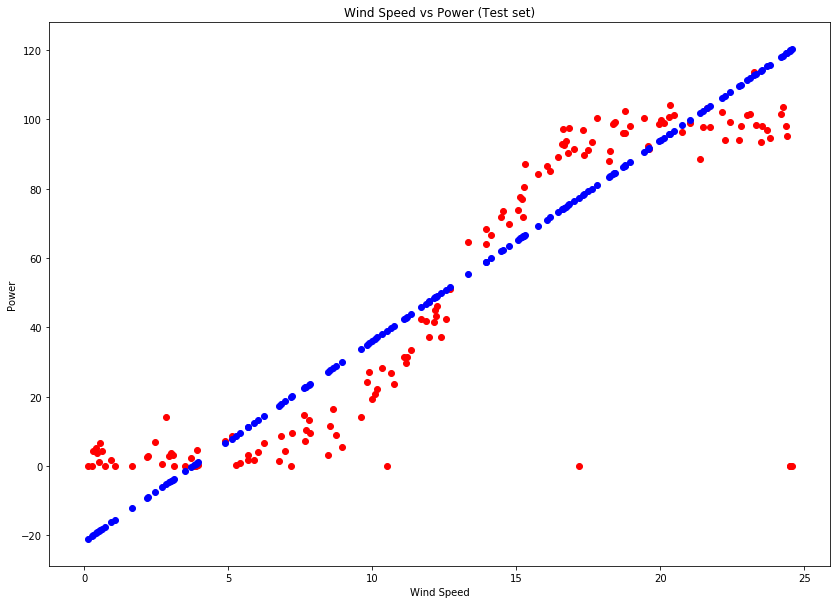

In [56]:
# Plotting the testing data with the predicted Data 
plt.figure(figsize=(14,10))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, model.predict(x_test), color = 'blue')
plt.title('Wind Speed vs Power (Test set)')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

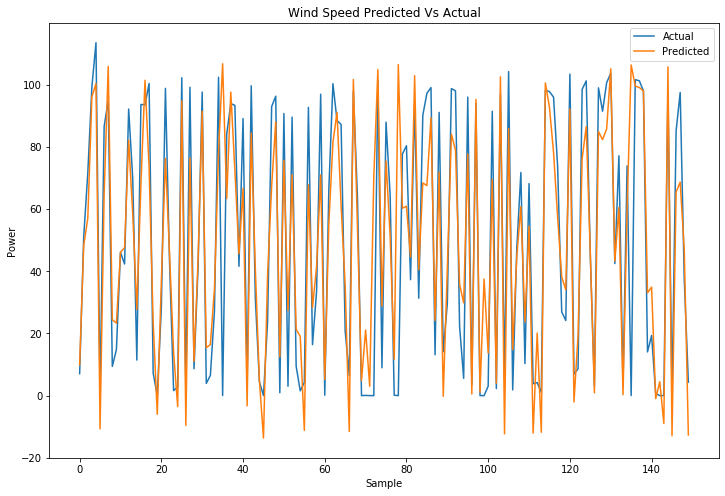

In [22]:
plt.figure(figsize=(12,8))
plt.plot(dfcompare.Actual, label='Actual')
plt.plot(dfcompare.Predicted, label='Predicted')
plt.title('Wind Speed Predicted Vs Actual')
plt.ylabel('Power')
plt.xlabel('Sample')
plt.legend()
plt.show()

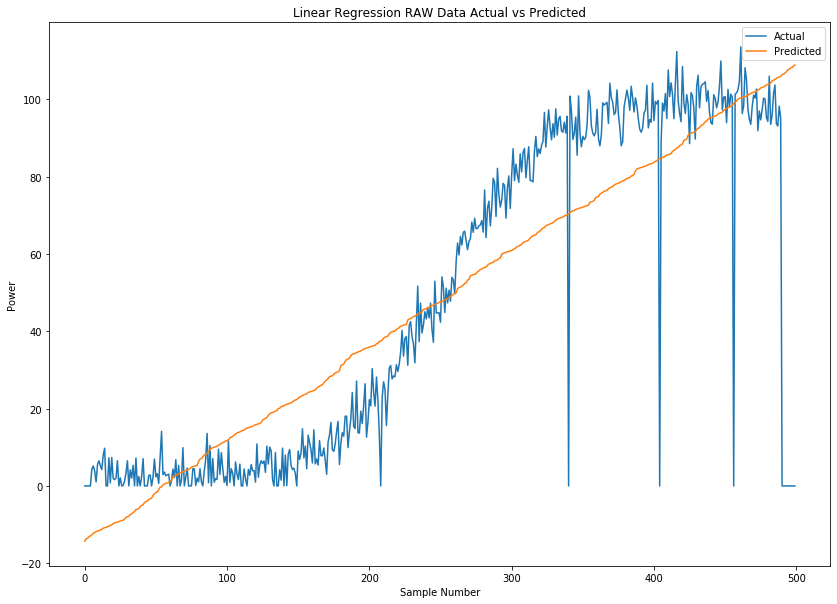

In [23]:
# All the samples are plotted comparing the actual versus the predicted according to the Linear prediction model for all the data samples in the dataset

plt.figure(figsize=(14,10))
plt.plot(y, label='Actual')
plt.plot(model.predict(x), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample Number')
plt.title('Linear Regression RAW Data Actual vs Predicted')
plt.legend()
plt.show()

***
## Linear Regression on Cleaned Data
***

In this section we will run the linear regression algorithm on all the dataset with the power = 0 values removed as these are not true power values.

<br>

In [24]:
### Add readings to a new dataframe where power is not equal to 0

cleaned_wind_df = wind_df.loc[wind_df['power'] != 0 ]
cleaned_wind_df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


In [25]:
cleaned_wind_df.shape #The Dataset is 451 rows and two columns with the pwer = 0 values removed

(451, 2)

In [26]:
cleaned_wind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 5 to 489
Data columns (total 2 columns):
speed    451 non-null float64
power    451 non-null float64
dtypes: float64(2)
memory usage: 10.6 KB


In [27]:
cleaned_wind_df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


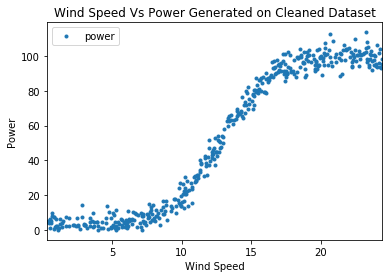

In [28]:
# Plot graph to get a visual view of the dataset without power = 0 values
cleaned_wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated on Cleaned Dataset')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()


As before the data needs to be divided in to attributes and labels. Attributes are independed labels and variables are dependent variables. So the variable power is dependent on the wind speed. 

The variables are given **'_c'** to indicate that they are from the cleaned data set **cleaned_wind_df**

In [29]:
# The two columns values are separated from the dataset and are assigned to variables x_c & y_c

x_c = cleaned_wind_df.iloc[:, :-1].values
y_c = cleaned_wind_df.iloc[:, 1].values

In [30]:
#The dataset is split for training and testing. The test size is 30% of the dataset and the training is 70%

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size=0.3, random_state=0)

In [31]:
#The linear regression class is imported and the fit method is called on the train variables x_train_c & y_train_c

model = lin.LinearRegression()
model.fit(x_train_c, y_train_c)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Thie line of code displays the intercept
print(model.intercept_)

-21.74094086434284


In [33]:
# This line of code displays the slop coefficient of x
print(model.coef_)

[5.77731013]


In [34]:
y_pred_c = model.predict(x_test_c)

In [35]:
#The y test values are complared with the y predicted values in a Dataframe for the cleaned Dataset

cleaned_dfcompare = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompare


,Actual,Predicted
0,9.385,23.657162
1,0.132,1.102543
2,80.418,67.605160
3,93.698,74.838353
4,65.605,55.894553
5,6.656,26.834683
6,7.350,-16.824450
7,94.071,92.765346
8,86.288,68.766400
9,0.929,9.629853


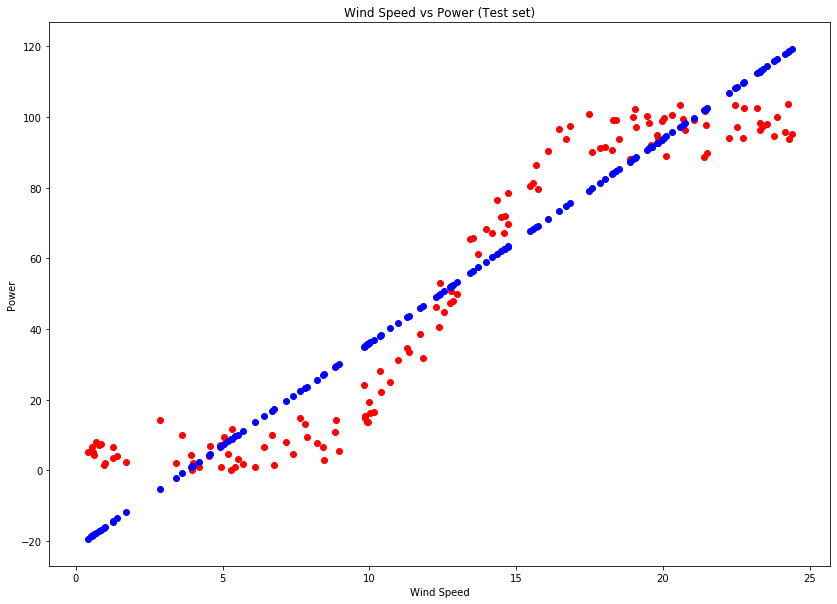

In [55]:
# Plotting the testing data with the predicted Data on the cleaned Dataset 
plt.figure(figsize=(14,10))
plt.scatter(x_test_c, y_test_c, color = 'red')
plt.scatter(x_test_c, model.predict(x_test_c), color = 'blue')
plt.title('Wind Speed vs Power (Test set)')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

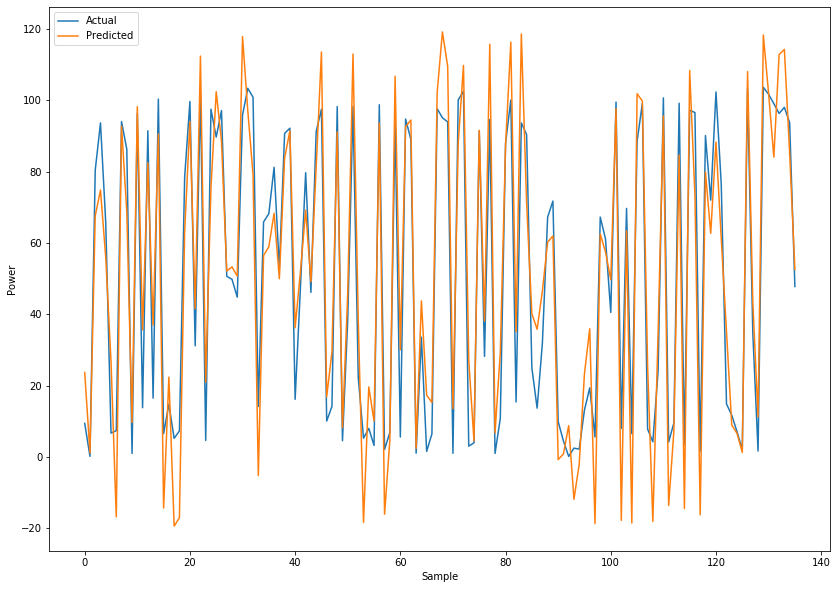

In [37]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompare.Actual, label='Actual')
plt.plot(cleaned_dfcompare.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample')
plt.legend()
plt.show()

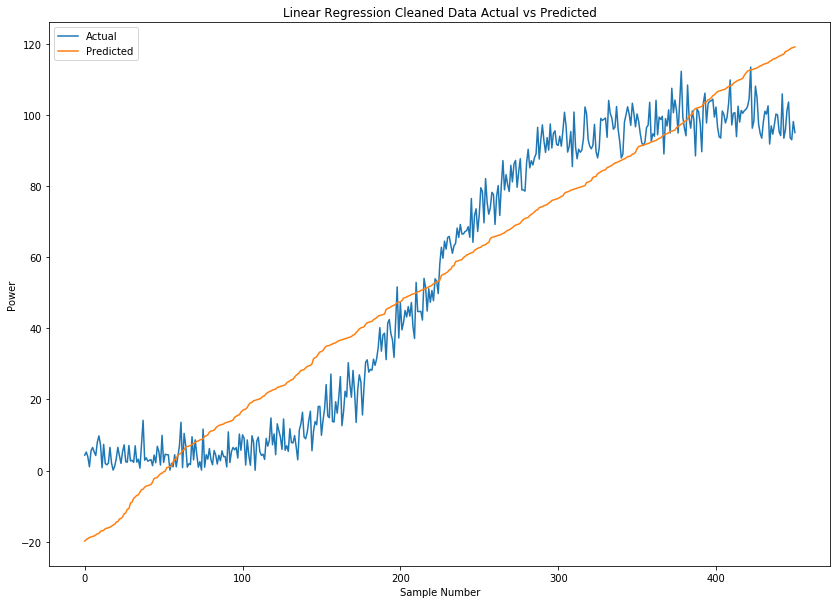

In [38]:
# All the samples are plotted comparing the actual versus the predicted according to the Linear prediction model for all the data samples in the dataset

plt.figure(figsize=(14,10))
plt.plot(y_c, label='Actual')
plt.plot(model.predict(x_c), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample Number')
plt.title('Linear Regression Cleaned Data Actual vs Predicted')
plt.legend()
plt.show()

### Evaluating the Accuracy of the Model

To evaluate the accuracy of the model on both the original dataset and the cleaned dataset we will use the following three evaluation metrics.

* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error

#### References

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

https://www.sciencedirect.com/topics/engineering/mean-absolute-error

https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-the-coefficient-of-variation/

https://www.geeksforgeeks.org/scipy-stats-variation-function-python/



In [39]:


# Testing  

#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# RMSE-  Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_test))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_test)))



Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0


In [40]:


#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  14.46211643465891
Mean Squared Error:  459.6312892379741
Root Mean Squared Error:  21.439013252432446


In [41]:
#calculate MAE, MSE, RMSE
# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  14.46211643465891
Mean Squared Error:  459.6312892379741
Root Mean Squared Error:  21.439013252432446


In [42]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test_c, y_pred_c))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_c, y_pred_c))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_c)))

Mean Absolute Error:  11.75568111431187
Mean Squared Error:  190.56823555495077
Root Mean Squared Error:  13.804645433873004


### Using Neural Network


In [43]:
import sklearn.neural_network as sknn






### Apply Neural Network to Raw dataset

In [57]:
#print(x)
x.shape

(500, 1)

In [45]:
# Train the neural network.
modelN = sknn.MLPRegressor(max_iter=100000).fit(x_train, y_train)


In [46]:
# Run the predictor for the x test set
y_predN = modelN.predict(x_test)

In [47]:
# Show the actual versus predictions.
result = np.array([y_test, modelN.predict(x_test)]).T
print(result)


[[7.06000000e+00 4.03536376e+00]
 [5.11490000e+01 5.03445589e+01]
 [7.17630000e+01 7.06286226e+01]
 [9.93570000e+01 8.68650455e+01]
 [1.13556000e+02 8.39683730e+01]
 [0.00000000e+00 2.72146977e+00]
 [8.66110000e+01 8.64447979e+01]
 [9.51170000e+01 8.01356430e+01]
 [9.38500000e+00 6.72150494e+00]
 [1.47880000e+01 5.44678184e+00]
 [4.61360000e+01 4.51935946e+01]
 [4.23360000e+01 4.86313779e+01]
 [9.22030000e+01 9.64877165e+01]
 [6.96990000e+01 7.34953456e+01]
 [1.14220000e+01 1.05513397e+01]
 [9.36980000e+01 9.05415019e+01]
 [9.35270000e+01 8.32025078e+01]
 [1.00429000e+02 9.44641564e+01]
 [7.24500000e+00 5.73005364e+00]
 [0.00000000e+00 3.02071058e+00]
 [2.81810000e+01 2.34704589e+01]
 [9.88550000e+01 9.58451220e+01]
 [4.31980000e+01 4.46225342e+01]
 [1.62600000e+00 4.25038903e+00]
 [2.70100000e+00 3.17804014e+00]
 [1.02281000e+02 8.78011030e+01]
 [1.60900000e+00 2.79226807e+00]
 [9.92140000e+01 9.59026622e+01]
 [8.62300000e+00 4.09576412e+00]
 [4.16920000e+01 4.06251118e+01]
 [9.767100

In [48]:
#regr.score(regr.predict(x_test),y_test)

In [93]:
#The y test values are complared with the y predicted values in a Dataframe for the RAW Dataset

cleaned_dfcompareN = pd.DataFrame({'Actual': y_test, 'Predicted': y_predN})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompareN

,Actual,Predicted
0,7.060,4.035364
1,51.149,50.344559
2,71.763,70.628623
3,99.357,86.865045
4,113.556,83.968373
5,0.000,2.721470
6,86.611,86.444798
7,95.117,80.135643
8,9.385,6.721505
9,14.788,5.446782


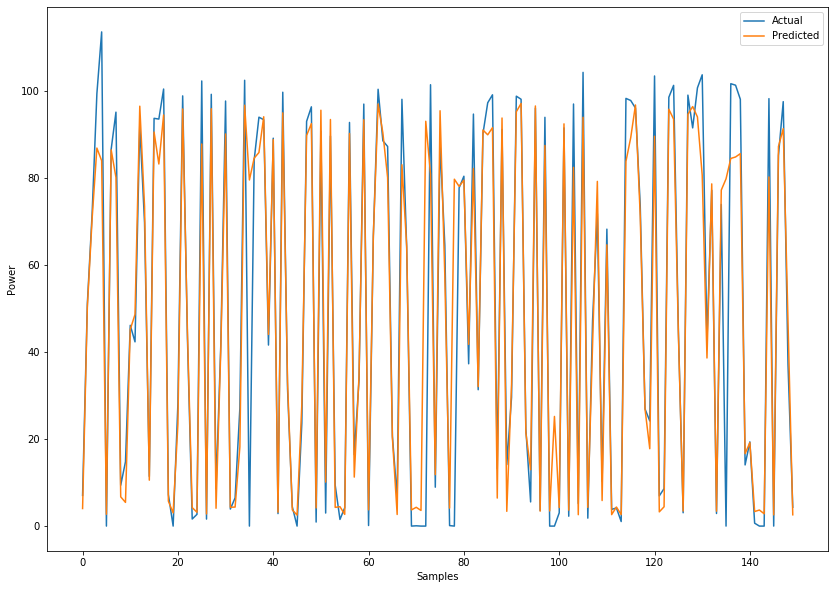

In [95]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompareN.Actual, label='Actual')
plt.plot(cleaned_dfcompareN.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Samples')
plt.legend()
plt.show()

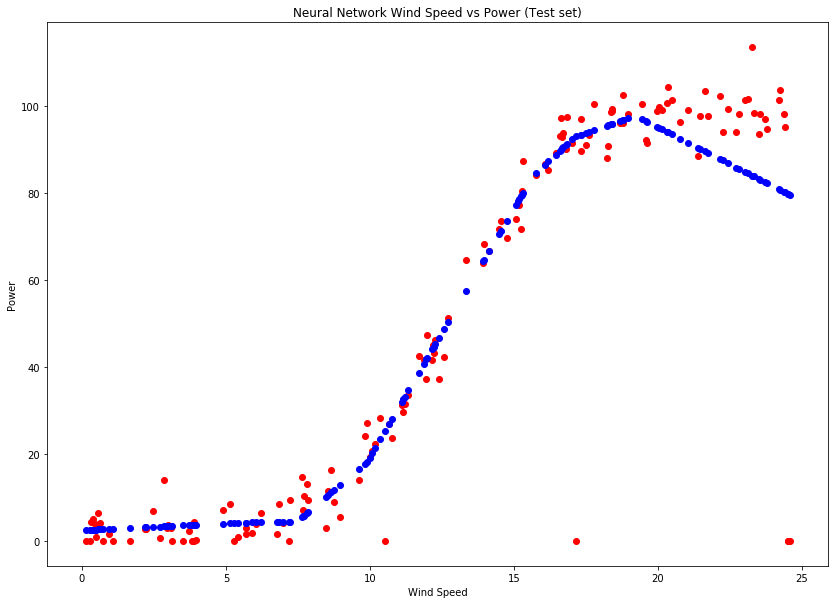

In [53]:
# Plotting the testing data with the predicted Data on the RAW Dataset 
plt.figure(figsize=(14,10))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_predN, color = 'blue')
plt.title('Neural Network Wind Speed vs Power (Test set)')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

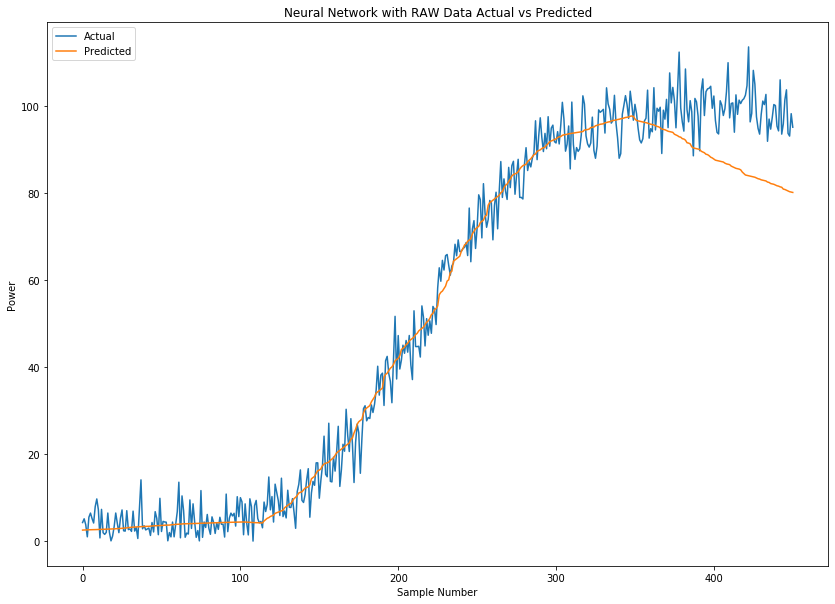

In [82]:
plt.figure(figsize=(14,10))
plt.plot(y_c, label='Actual')
plt.plot(modelN.predict(x_c), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample Number')
plt.title('Neural Network with RAW Data Actual vs Predicted')
plt.legend()
plt.show()

In [83]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y, model.predict(x)))
print("Mean Squared Error: ",metrics.mean_squared_error(y, model.predict(x)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y, model.predict(x))))

Mean Absolute Error:  14.022656102469067
Mean Squared Error:  515.885960221701
Root Mean Squared Error:  22.71312308384078


In [ ]:
plt.figure(figsize=(14,10))
plt.plot(y, label='Actual')
plt.plot(.predict(x), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample Number')
plt.title('Neural Network with RAW Data Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
#regr.score(regr.predict(x),y)

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompare.Actual, label='Actual')
plt.plot(cleaned_dfcompare.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample')
plt.legend()
plt.show()

### Apply Neural Network to Cleaned Dataset

In [84]:
# Train the neural network.
modelNC = sknn.MLPRegressor(max_iter=10000).fit(x_train_c, y_train_c)


In [85]:
# Show the predictions.
result = np.array([y_c, modelNC.predict(x_c)]).T

In [86]:
result

array([[4.33100000e+00, 3.19325154e+00],
       [5.18600000e+00, 3.20156841e+00],
       [3.82600000e+00, 3.20711299e+00],
       [1.04800000e+00, 3.21276846e+00],
       [5.55300000e+00, 3.21554075e+00],
       [6.49800000e+00, 3.21831304e+00],
       [5.24100000e+00, 3.22108533e+00],
       [4.22000000e+00, 3.22662991e+00],
       [7.97400000e+00, 3.23217449e+00],
       [9.74600000e+00, 3.23494678e+00],
       [7.27100000e+00, 3.24603594e+00],
       [7.95000000e-01, 3.24880823e+00],
       [7.35000000e+00, 3.25158052e+00],
       [1.99600000e+00, 3.25989739e+00],
       [1.60900000e+00, 3.26266968e+00],
       [2.06400000e+00, 3.26544197e+00],
       [6.51100000e+00, 3.26821426e+00],
       [2.08500000e+00, 3.27375885e+00],
       [1.21000000e-01, 3.27930343e+00],
       [1.20800000e+00, 3.28484801e+00],
       [3.37300000e+00, 3.29593717e+00],
       [6.51000000e+00, 3.29870946e+00],
       [4.15600000e+00, 3.31257091e+00],
       [2.00500000e+00, 3.31534320e+00],
       [5.352000

In [87]:
# Run the predictor for the x test set
y_predNC = modelNC.predict(x_test_c)

In [88]:
#calculate MAE, MSE, RMSE

# MAE - Mean Absolute Error
# MSE - Mean Squared Error
# Square Root Mean Squared Error

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_c, modelNC.predict(x_c)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_c, modelNC.predict(x_c)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_c, modelNC.predict(x_c))))

Mean Absolute Error:  3.3803563572023636
Mean Squared Error:  18.67447318298466
Root Mean Squared Error:  4.32139713321799


In [89]:
#The y test values are complared with the y predicted values in a Dataframe for the Cleaned Dataset

cleaned_dfcompareNC = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_predNC})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompareNC

,Actual,Predicted
0,9.385,7.381298
1,0.132,3.880373
2,80.418,81.147630
3,93.698,90.160080
4,65.605,58.376809
5,6.656,10.188428
6,7.350,3.251581
7,94.071,96.689202
8,86.288,83.315581
9,0.929,4.510473


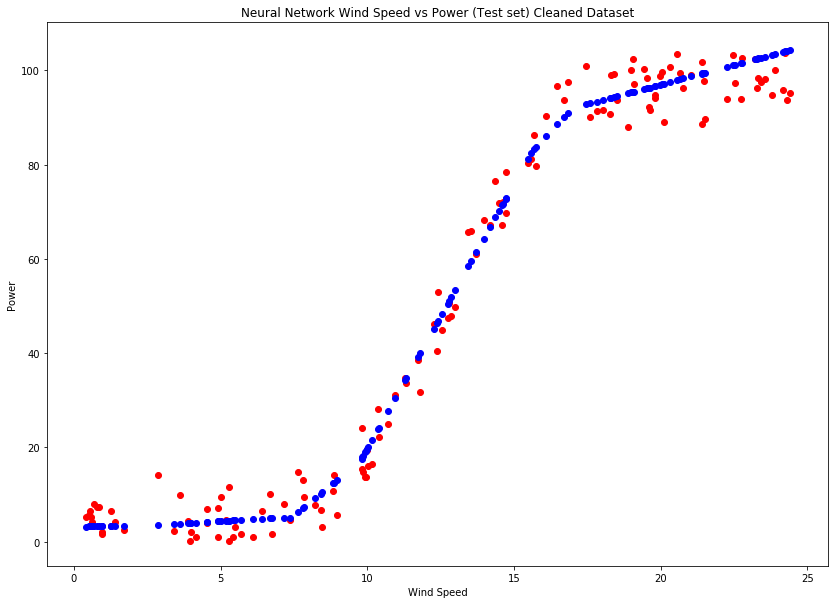

In [90]:
# Plotting the testing data with the predicted Data on the Cleaned Dataset 
plt.figure(figsize=(14,10))
plt.scatter(x_test_c, y_test_c, color = 'red')
plt.scatter(x_test_c, y_predNC, color = 'blue')
plt.title('Neural Network Wind Speed vs Power (Test set) Cleaned Dataset')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

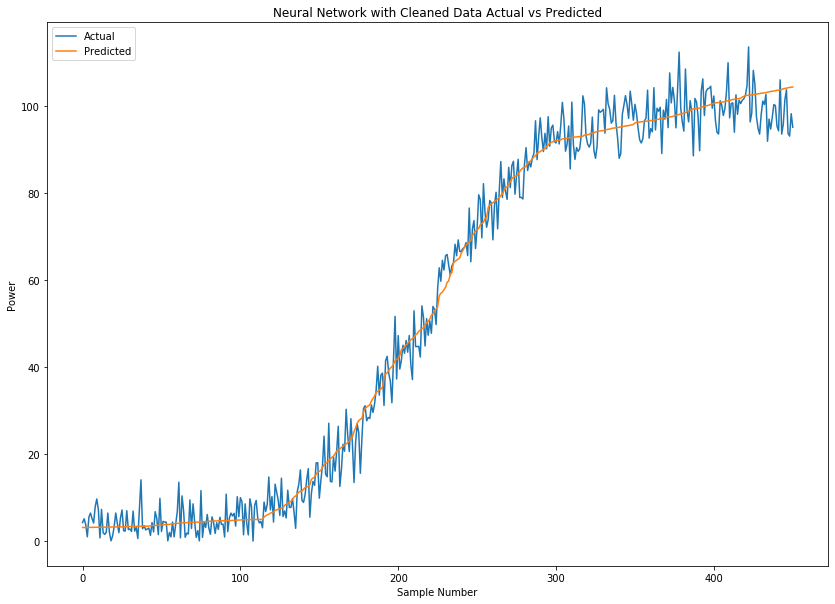

In [91]:
plt.figure(figsize=(14,10))
plt.plot(y_c, label='Actual')
plt.plot(modelNC.predict(x_c), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Sample Number')
plt.title('Neural Network with Cleaned Data Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
#The y test values are complared with the y predicted values in a Dataframe for the Cleaned Dataset

cleaned_dfcompareNC = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_predNC})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompareNC

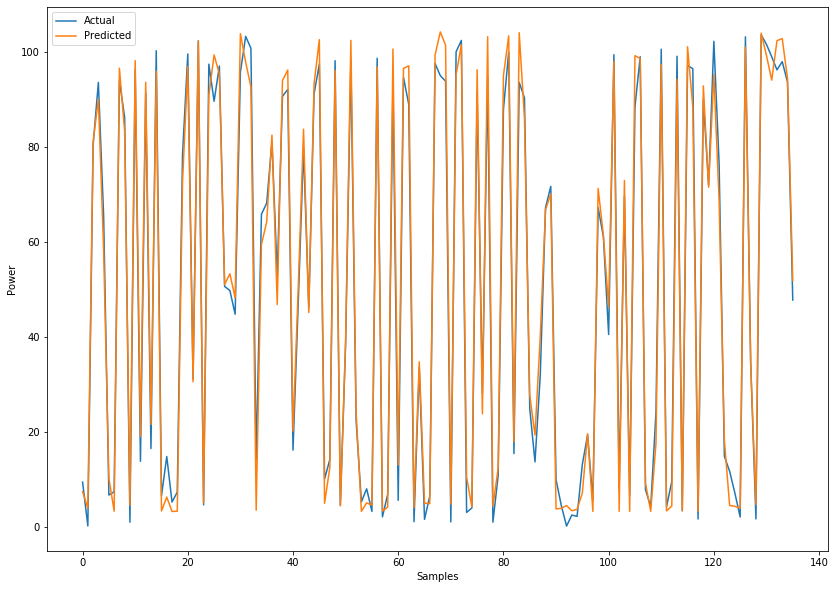

In [94]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompareNC.Actual, label='Actual')
plt.plot(cleaned_dfcompareNC.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Samples')
plt.legend()
plt.show()

### References 

(https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/) "Working With Pandas DataFrames in Python"

(https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) "Linear Regression in Python with Scikit-Learn"



In [ ]:
# >>> from sklearn.neural_network import MLPRegressor
# >>> from sklearn.datasets import make_regression
# >>> from sklearn.model_selection import train_test_split
# >>> X, y = make_regression(n_samples=200, random_state=1)
# >>> X_train, X_test, y_train, y_test = train_test_split(X, y,
# ...                                                     random_state=1)
# >>> regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
# >>> regr.predict(X_test[:2])
# array([-0.9..., -7.1...])
# >>> regr.score(X_test, y_test)
# 0.4...

In [ ]:
regr = sknn.MLPRegressor(max_iter=10000).fit(x_train, y_train)
regr.predict(x_test[:2])
regr.score(x_test, y_test)

In [ ]:
# Show the predictions.
test_result = np.array([y_test, regr.predict(x_test)]).T

In [ ]:
print(test_result)

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, regr.predict(x_test)))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, regr.predict(x_test)))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, regr.predict(x_test))))

***
## Web Application and Python Functions
***

In this section the web application and its associated python modules or functions and the user web interface is discussed. The components of the web application are

* **algorithms.py** - This is a python program with two algorithms, one for Linear Regresson and one for Neural Networks algorithm. The program has one Linear regresssion algorithm and two Neural network algorithms, there are three functiosn for the webapp python program to call each function.
<br>

* **webapp.py** - This is a python program written to function as the web server using Flask. It displays homepage.html in Templates folder when you browse to http://127.0.0.1:5000 one this python program is run and flask is operating. The webpage homepage.html sends the speed input value entered by the user via POST and it returns a HTML table with three rows with three function calls converted to string to each of the algorithms in the algorithms.py program to display on the users webpage.
<br>

* **homepage.html** - This is the user interface the user enters a number for the windspeeed and clisks on Submit button
<br>

* **test_algorithms.py** - This was a test program to make the three function calls to test the algorithm functions.
<br>

<br>

In [ ]:




####################### Towards Datascience example taken from 

https://towardsdatascience.com/ml-preface-2-355b1775723e "Machine Learning Introduction 2: Our first Example"


### Algorithms 

As mentioned the two algorithms used are 

* Linear Regression 
* Neural Network MPLRegressor

There is only one function using Linear Regression as this function did not accuratly predict the data in the dataset. A much more accurate prediction came from the Neural Network MLPRegressor function. There are two functions for the MLP Regressor function one on the RAW data including power values equal to 0 and one with the clensed dataset that the power = 0 values removed. 

The code used for the functions and the functions to call them is given below.


In [97]:
import sys 
#print("The system paths is: ",sys.path)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.neural_network as sknn
import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D
import os

# Load dataset from csv_file.
wind_df = pd.read_csv('./powerproduction.csv')

# Clean wind_df Dataset by removing power values that are not equal to 0 and assign it to a new Dataframe cleaned_wind_df
cleaned_wind_df = wind_df.loc[wind_df['power'] != 0 ]

# The linear regression code was party taken from Ian McLoughlins Lecture with modifications
# https://web.microsoftstream.com/video/08404c4e-fe8b-4b84-832e-6bee57b5b160
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

def modelLinearRegression(wind_df, speed_input):
    
    speed_input = speed_input

    speed = wind_df["speed"].to_numpy()
    y = wind_df["power"].to_numpy()

    # print("speed is before reshape ",speed)
    speed = speed.reshape(-1, 1)
    # print("speed is after reshape ",speed)

    model = lin.LinearRegression()
    model.fit(speed, y)

    speed_input_array = [[speed_input]]
    print("speed_input_array is: ",speed_input_array )

    result = model.predict(speed_input_array)
    value = result.item(0)

    r = model.score(speed, y)
    p = [model.intercept_, model.coef_[0]]

    return (round(value,2))

    # return(predict(float(speed_input)))

# This is a calling function or the WebApp for Linear Regression Algorithm
# There is also an if statement that checks if the inputted Wind Speed is in the given power range 0.325 and 24.399
def receive_speed_from_webpage(speed_input):
    speed_input = speed_input
    # If speed from Webpage is between 0.325 and 24.399 then run it through the algorithm if not return 0
    if (speed_input >= 0.325 and speed_input <= 24.399):
        # print("Running Wind Speed Through Algorithm")
        return modelLinearRegression(wind_df,speed_input)
    else:
        # print("Returning 0")
        return 0

# The Neural network algorithm was taken and developed from this example below and from the code format from the Linear Regression algorithm    
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# https://towardsdatascience.com/ml-preface-2-355b1775723e

def modelNeuralMLP(wind_df, speed_input):

    x = wind_df.iloc[:, :-1].values
    y = wind_df.iloc[:, 1].values
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    y = wind_df["power"].to_numpy()

    modelN = sknn.MLPRegressor(max_iter= 10000).fit(x_train, y_train)
    # print("The value of model is: ",model)
    # print("x_test is: ",x_test[0])

    speed_input_array = [[speed_input]]
    print("speed_input_array is: ",speed_input_array )

    result = modelN.predict(speed_input_array)
    value = result.item(0)
    return (round(value,2))

# This is a calling function or the WebApp for Neural Network Algorithm
def receive_speed_from_webpage_Neural(speed_input):
    speed_input = speed_input
    # If speed from Webpage is between 0.325 and 24.399 then run it through the algorithm if not return 0
    if (speed_input >= 0.325 and speed_input <= 24.399):
        # print("Running Wind Speed Through Algorithm")
        return modelNeuralMLP(wind_df, speed_input)
    else:
        # print("Returning 0")
        return 0

# This is the same Neural Network Algorithm but on the cleansed Dataset
# There is also an if statement that checks if the inputted Wind Speed is in the given power range 0.325 and 24.399
def modelNeuralMLPClean(cleaned_wind_df, speed_input):

    x_c = cleaned_wind_df.iloc[:, :-1].values
    y_c = cleaned_wind_df.iloc[:, 1].values
    
    x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size=0.3, random_state=0)
    
    # num_samples = cleaned_wind_df.shape[0]
    # cutoff = (num_samples * 3) // 4
    
    # speed = cleaned_wind_df["speed"].to_numpy()
    # y = cleaned_wind_df["power"].to_numpy()

    modelNC = sknn.MLPRegressor(max_iter= 10000).fit(x_train_c, y_train_c)
    # print("The value of model is: ",model)
    # print("x_test_c is: ",x_test_c[0])

    speed_input_array = [[speed_input]]
    print("speed_input_array is: ",speed_input_array )

    result = modelNC.predict(speed_input_array)
    value = result.item(0)
    return (round(value,2))

# This is a calling function or the WebApp for Neural Network Algorithm 
# There is also an if statement that checks if the inputted Wind Speed is in the given power range 0.325 and 24.399
def receive_speed_from_webpage_Neural_Clean(speed_input):
    print("Before speed_input = speed_input",type(speed_input))
    speed_input = speed_input
    # If speed from Webpage is between 0.325 and 24.399 then run it through the algorithm if not return 0
    if (speed_input >= 0.325 and speed_input <= 24.399):
        # print("Running Wind Speed Through Algorithm")
        return modelNeuralMLPClean(cleaned_wind_df, speed_input)
    else:
        # print("Returning 0")
        return 0

In [99]:
#The Linear regression function on the RAW dataset can be called by calling the following function the value of the power is returned
receive_speed_from_webpage(10)

speed_input_array is:  [[10]]


35.28

In [100]:
#The MLPregressor function on the RAW dataset can be called by calling the following function the value of the power is returned
receive_speed_from_webpage_Neural(10)

speed_input_array is:  [[10]]


19.86

In [102]:
#The MLPregressor function on the Cleaned dataset can be called by calling the following function the value of the power is returned

receive_speed_from_webpage_Neural_Clean(10)

Before speed_input = speed_input <class 'int'>
speed_input_array is:  [[10]]


19.83

It can be see from the three function calls with a wind speed of 10 that the two neural network functions are both more accurate at ~20kW the linear regression algorith is giving 30kW this is where the linear regression line is off the sigma curve of the dataset. 


It can also be seen that there is if statements on each of the function calls returning 0 kW if the entered wind speed is not between **0.325 & 24.399** 

### Web Server

As mentioned the Web server is a python program that used flask to host the application. The python code for the webserver is given below.

<br>

<img src="Images/webapppyimage.JPG" alt="Webapp Python Program Code" width="1000">

* Flask module is imported and the app routes are created. 

* There are two app.routes with two functions. The first function displays the homepage.html in templates folder this is when flask is run and you browse to http://127.0.0.1:5000 or whatever port flask is running on the local machine or venv

* The 2nd app.route is to reveive the data from the homepage form with a POST method. The function returns the table structure along with basic styling with the three function calls as string variables. 

### User Web Page

The user webpage is a simple webpage that dislays a form to the user when you browse to http://127.0.0.1:5000 once Flask is up and running from the Flask App server program appserver.py

The user enters the speed as a number and clicks on submit. The webpage send the value entered as a POST html request to the web server and the three values along with the table structure of the results to display to the user. The user webpage code is give below.


<img src="Images/webpage.JPG" alt="Webapp Homepage Code" width="1000">





### Test Algorithms Program

While the test_algorithms.py program is not directly part of the WebApp it was used to test the function calls that the webpage would do to get the power values. The code is give below.

<img src="Images/test_algorithms.JPG" alt="Test Algorithms Program" width="700">



### WebApplication Running Instructions 

To run the Web application follow these instructions:

1. Download the WebApp folder from Github project 

2. asjfp